In [11]:
pip install dvc pandas numpy scikit-learn matplotlib seaborn lakefs_client tensorflow tensorflow-privacy


Note: you may need to restart the kernel to use updated packages.


In [17]:
!dvc add v1_athletes.csv
!git add v1_athletes.csv.dvc .gitignore
!git commit -m "Add v1 dataset"

!dvc add v2_athletes_clean.csv
!git add v2_athletes_clean.csv.dvc
!git commit -m "Add v2 cleaned dataset"



⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/siyisun/opr hw1/.dvc/cache/files/md5'| |0/? [00:0
                                                                                
!
  0%|          |Adding v1_athletes.csv to cache       0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/siyisun/opr hw1/v10/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00,  6.82file/s]

To track the changes with git, run:

	git add .gitignore v1_athletes.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
[main (root-commit) c97da29] Add v1 dataset
 Committer: Siyi Sun <siyisun@SiyideMacBook-Pro.local>
Your name and email address were configured

In [35]:
!pip install dvc


In [45]:
####### DVC

In [76]:
#1,2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os


df = pd.read_csv("athletes.csv")


df["total_lift"] = df[["deadlift", "backsq", "candj", "snatch"]].sum(axis=1)
df_v1 = df.copy()
df_v1.to_csv("v1.csv", index=False)

import pandas as pd
import numpy as np

data = pd.read_csv("athletes.csv")

# Step 1: Drop rows with missing critical values
data = data.dropna(subset=[
    'region','age','weight','height','howlong','gender','eat',
    'train','background','experience','schedule',
    'deadlift','candj','snatch','backsq'
])

# Step 2: Drop irrelevant columns
drop_cols = ['affiliate','team','name','athlete_id','fran','helen','grace',
             'filthy50','fgonebad','run400','run5k','pullups','train']
data = data.drop(columns=drop_cols)

# Step 3: Remove outliers
data = data[data['weight'] < 1500]
data = data[data['gender'] != '--']
data = data[data['age'] >= 18]
data = data[(data['height'] < 96) & (data['height'] > 48)]

data = data[((data['deadlift'] > 0) & (data['deadlift'] <= 1105)) | 
            ((data['gender'] == 'Female') & (data['deadlift'] <= 636))]
data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

# Step 4: Clean survey answers
data = data.replace({'Decline to answer|': np.nan})
data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

# Step 5: Add total_lift column
data['total_lift'] = data[['deadlift', 'candj', 'snatch', 'backsq']].sum(axis=1)

# Step 6: Save cleaned dataset as v2
data.to_csv("v2.csv", index=False)




In [48]:
#3
from sklearn.model_selection import train_test_split

def split_data(df):
    X = df[["age", "weight", "height"]].values
    y = df["total_lift"].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_v1, X_test_v1, y_train_v1, y_test_v1 = split_data(df_v1)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = split_data(data)


In [56]:
#4

!dvc add v1.csv
!git add v1.csv.dvc v1.csv .gitignore
!git commit -m "Add dataset version 1"

!dvc add v2.csv
!git add v2.csv.dvc v2.csv
!git commit -m "Add dataset version 2"



⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/siyisun/opr hw1/.dvc/cache/files/md5'| |0/? [00:0
                                                                                
!
  0%|          |Adding v1.csv to cache                0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/siyisun/opr hw1/v10/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00,  6.86file/s]

To track the changes with git, run:

	git add .gitignore v1.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
The following paths are ignored by one of your .gitignore files:
v1.csv
hint: Use -f if you really want to add them.
hint: Turn this message off by run

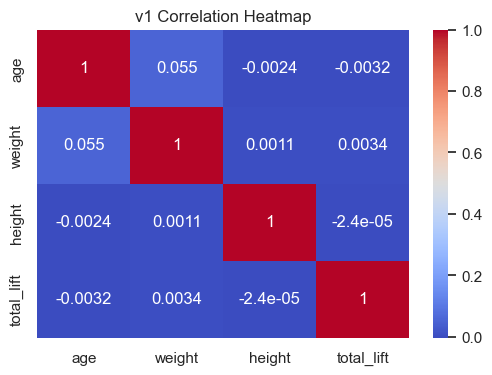

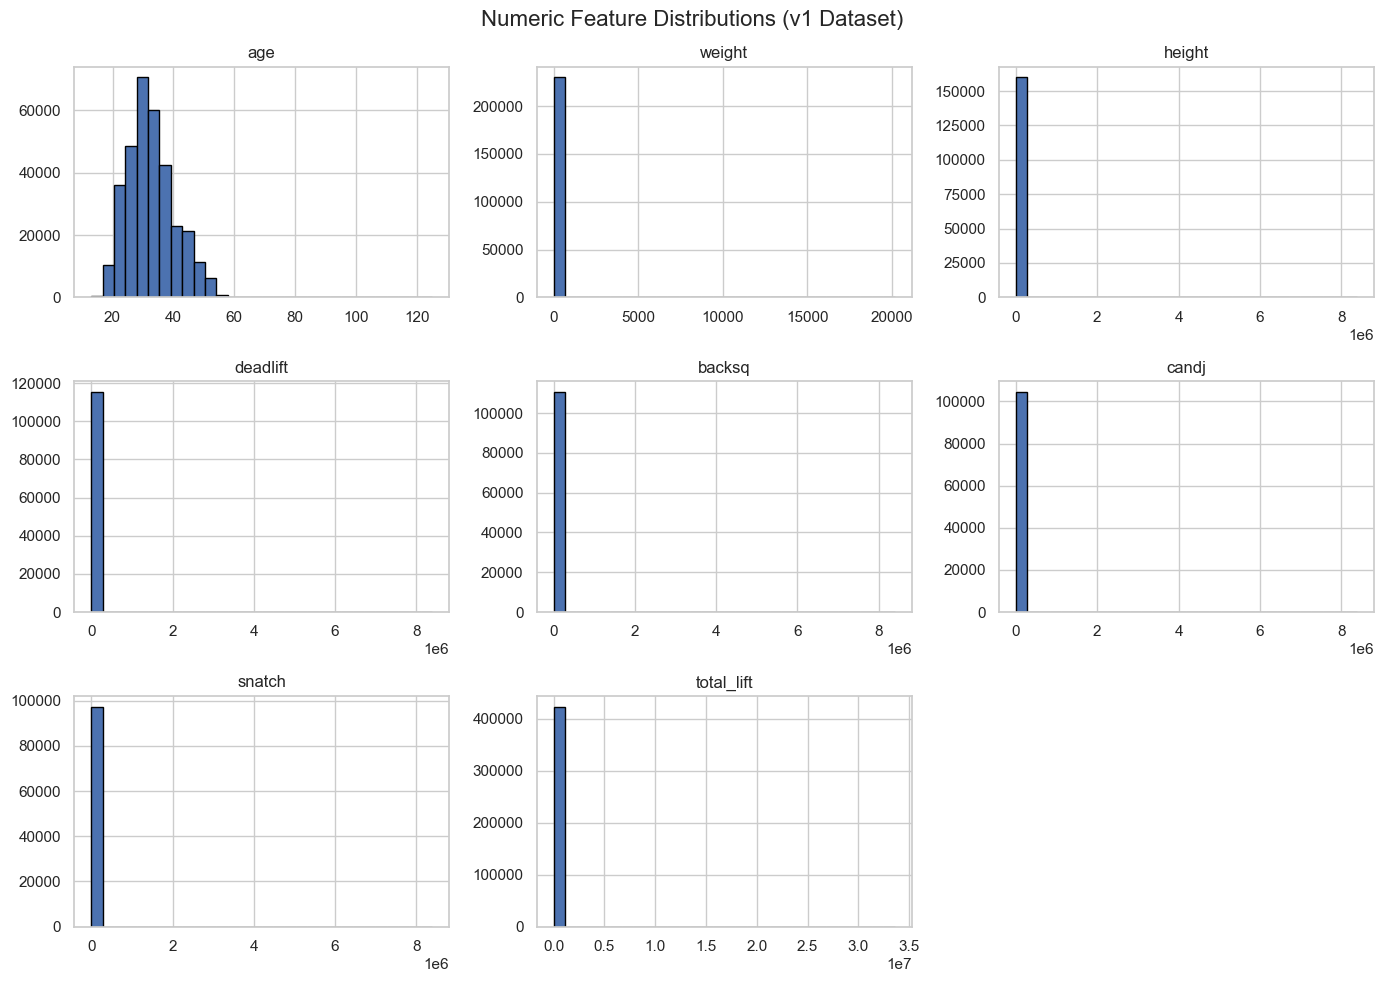

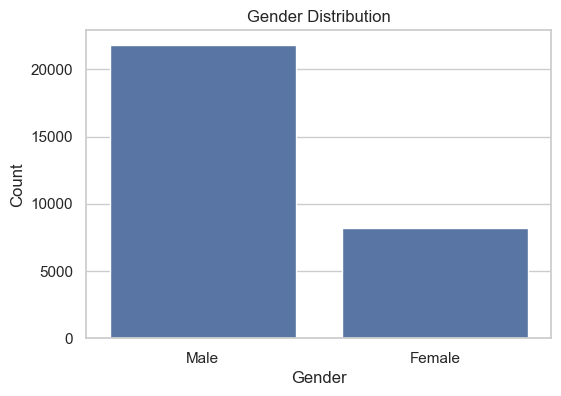

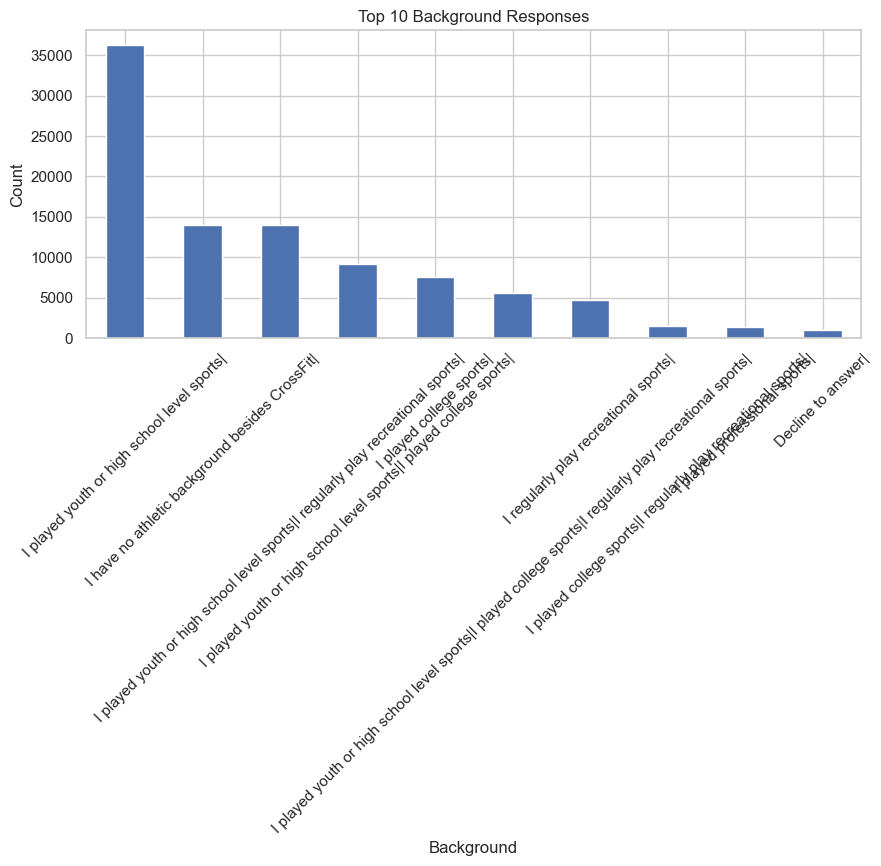

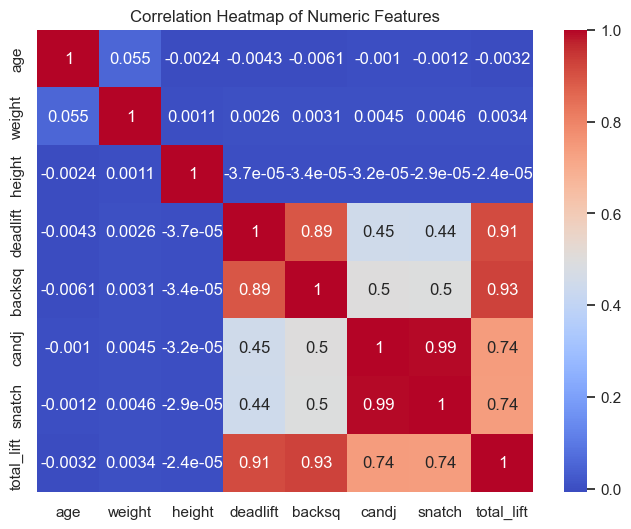

In [78]:
#5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(df_v1[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("v1 Correlation Heatmap")
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")



numeric_cols = ['age', 'weight', 'height', 'deadlift', 'backsq', 'candj', 'snatch', 'total_lift']
df_v1[numeric_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Numeric Feature Distributions (v1 Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=df_v1)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10, 4))
df_v1['background'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Background Responses")
plt.xlabel("Background")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df_v1[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [66]:
#6,7
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


imputer = SimpleImputer(strategy='mean') 


X_train_v1 = imputer.fit_transform(X_train_v1)
X_test_v1 = imputer.transform(X_test_v1)

model_v1 = LinearRegression()
model_v1.fit(X_train_v1, y_train_v1)

y_pred_v1 = model_v1.predict(X_test_v1)

mae_v1 = mean_absolute_error(y_test_v1, y_pred_v1)
r2_v1 = r2_score(y_test_v1, y_pred_v1)



rmse_v1 = mean_squared_error(y_test_v1, y_pred_v1, squared=False)
#7
results = pd.DataFrame({
    'Version': ['v1 (Raw)'],
    'MAE': [mae_v1],
    'RMSE': [rmse_v1],
    'R^2': [r2_v1]
})
print(results)


    Version          MAE           RMSE       R^2
0  v1 (Raw)  1399.595278  158747.440267 -0.442434


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Basic Statistics:

            region gender           age        height        weight  \
count        30029  30029  30029.000000  30029.000000  30029.000000   
unique          17      2           NaN           NaN           NaN   
top     South East   Male           NaN           NaN           NaN   
freq          2988  21823           NaN           NaN           NaN   
mean           NaN    NaN     32.123847     68.871924    177.130607   
std            NaN    NaN      7.435425      3.774937     32.399828   
min            NaN    NaN     18.000000     52.000000      5.000000   
25%            NaN    NaN     27.000000     66.000000    155.000000   
50%            NaN    NaN     31.000000     69.000000    178.000000   
75%            NaN    NaN     37.000000     72.000000    197.000000   
max            NaN    NaN     56.000000     83.000000    474.000000   

               candj        snatch      deadlift        backsq  \
count   30029.000000  30029.000000  30029.000000  30029.0000

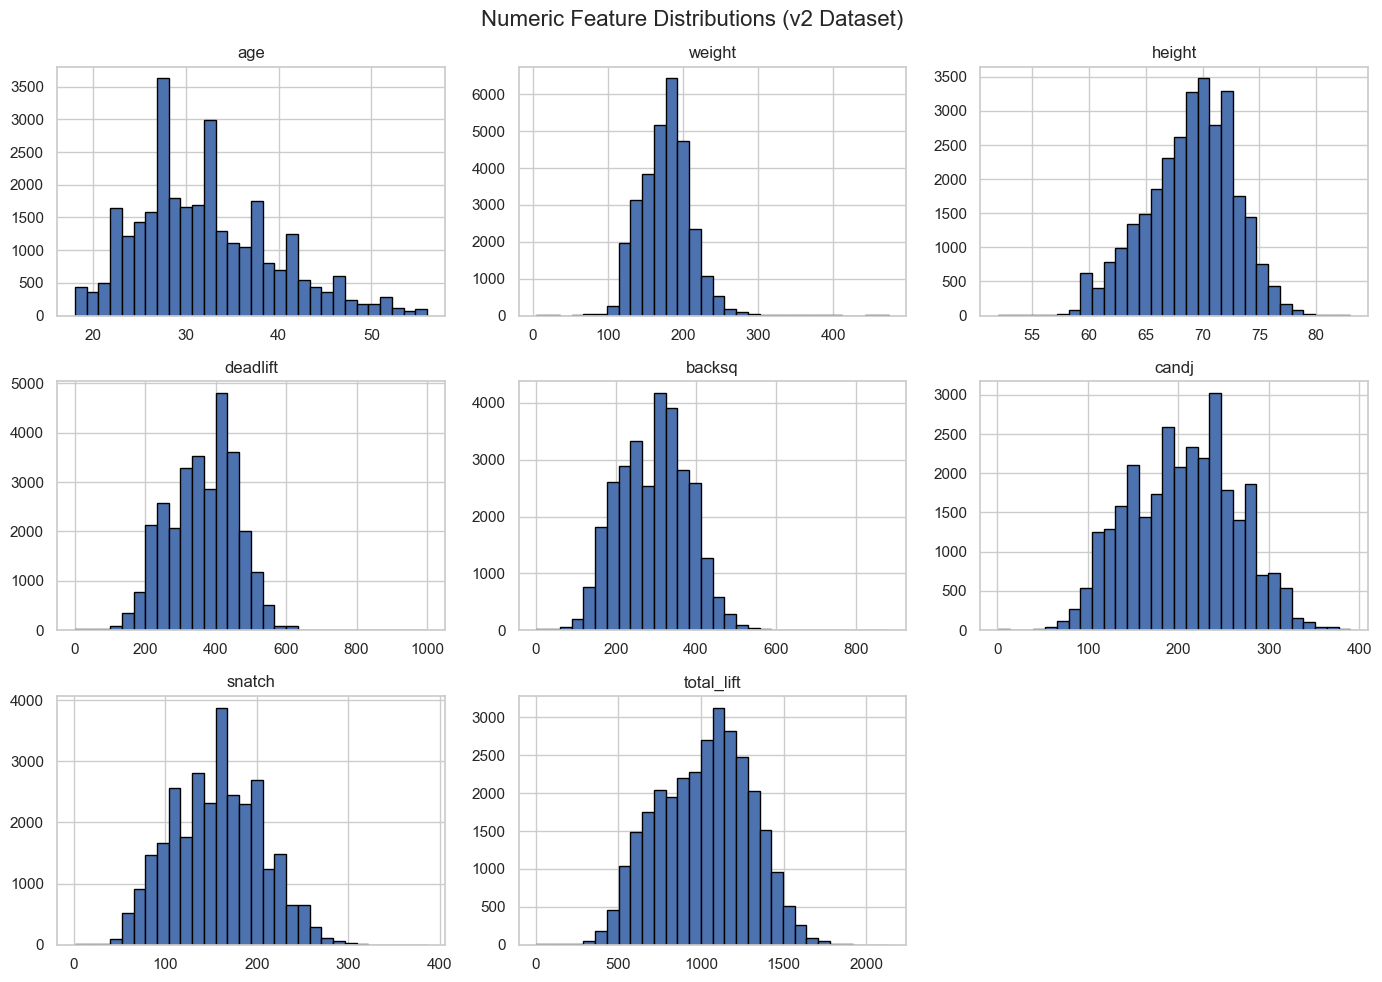

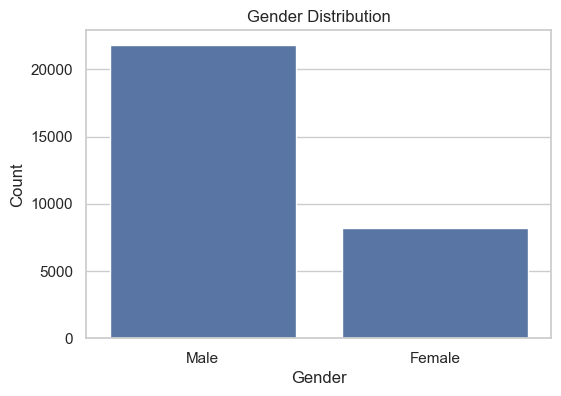

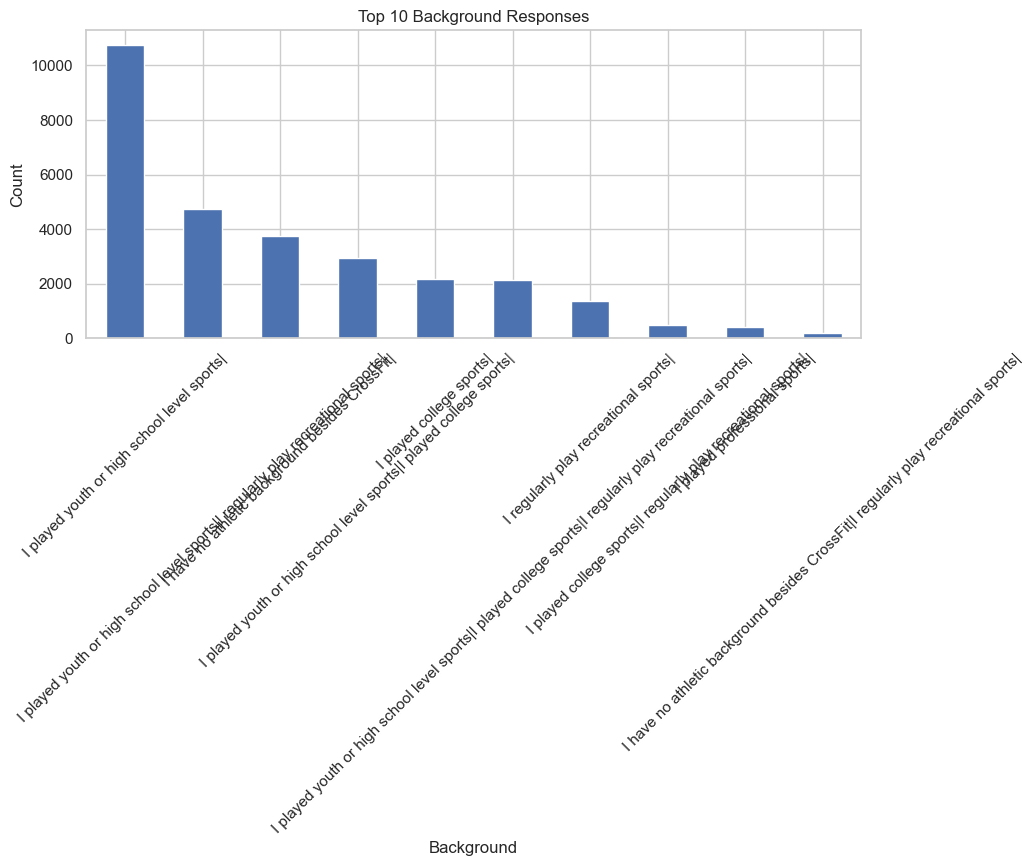

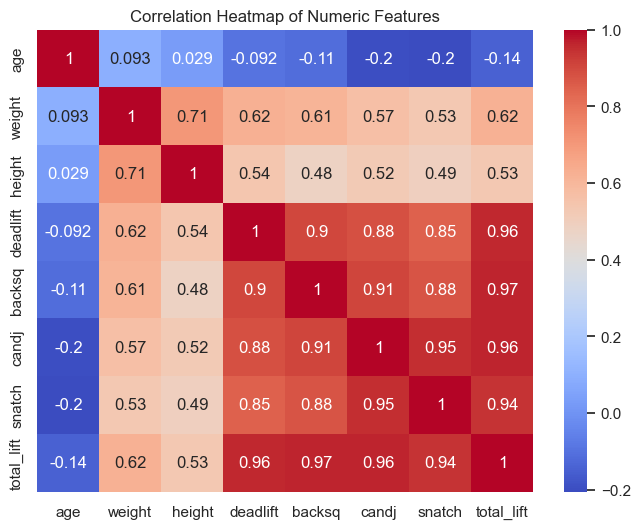

In [68]:
#8,9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")



numeric_cols = ['age', 'weight', 'height', 'deadlift', 'backsq', 'candj', 'snatch', 'total_lift']
data[numeric_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Numeric Feature Distributions (v2 Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10, 4))
data['background'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Background Responses")
plt.xlabel("Background")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [74]:
#10，11
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


data['total_lift'] = data[['deadlift', 'backsq', 'candj', 'snatch']].sum(axis=1)

features = ['age', 'weight', 'height']
target = 'total_lift'


data_model = data.dropna(subset=features + [target])

X = data_model[features].values
y = data_model[target].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


results = pd.DataFrame({
    'Version': ['v2 '],
    'MAE': [mae],
    'RMSE': [rmse],
    'R^2': [r2]
})
print(results)



  Version         MAE        RMSE       R^2
0     v2   162.948154  206.461915  0.445032


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
###Lakefs

In [84]:
#1，2，3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv("athletes.csv")


v1 = data.copy()
v1['total_lift'] = v1[['deadlift','candj','snatch','backsq']].sum(axis=1)
v1.to_csv("v1.csv", index=False)

v2 = data.dropna(subset=['region','age','weight','height','howlong','gender','eat', 
                         'train','background','experience','schedule','howlong', 
                         'deadlift','candj','snatch','backsq','experience',
                         'background','schedule','howlong'])

v2 = v2.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',
                      'filthy50','fgonebad','run400','run5k','pullups','train'])

v2 = v2[v2['weight'] < 1500]
v2 = v2[v2['gender'] != '--']
v2 = v2[v2['age'] >= 18]
v2 = v2[(v2['height'] < 96) & (v2['height'] > 48)]

v2 = v2[(v2['deadlift'] > 0) & ((v2['deadlift'] <= 1105) | 
                               ((v2['gender'] == 'Female') & (v2['deadlift'] <= 636)))]
v2 = v2[(v2['candj'] > 0) & (v2['candj'] <= 395)]
v2 = v2[(v2['snatch'] > 0) & (v2['snatch'] <= 496)]
v2 = v2[(v2['backsq'] > 0) & (v2['backsq'] <= 1069)]

v2 = v2.replace({'Decline to answer|': np.nan})
v2 = v2.dropna(subset=['background','experience','schedule','howlong','eat'])
v2['total_lift'] = v2[['deadlift','candj','snatch','backsq']].sum(axis=1)
v2.to_csv("v2.csv", index=False)

from sklearn.model_selection import train_test_split

def split_data(df):
    X = df[["age", "weight", "height"]].values
    y = df["total_lift"].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_v1, X_test_v1, y_train_v1, y_test_v1 = split_data(v1)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = split_data(v2)

In [88]:
#4
v1_path = "lakefs://athletes/main/athletes.csv"


v2_path = "lakefs://athletes/main/v2_athletes_clean.csv"


In [ ]:

lakectl fs upload \
  --source ~/lakefs_data/v1/athletes.csv \
  lakefs://athletes/main/athletes.csv

lakectl commit -m "Add v1 dataset" --path main/athletes.csv

lakectl tag create v1 --ref main

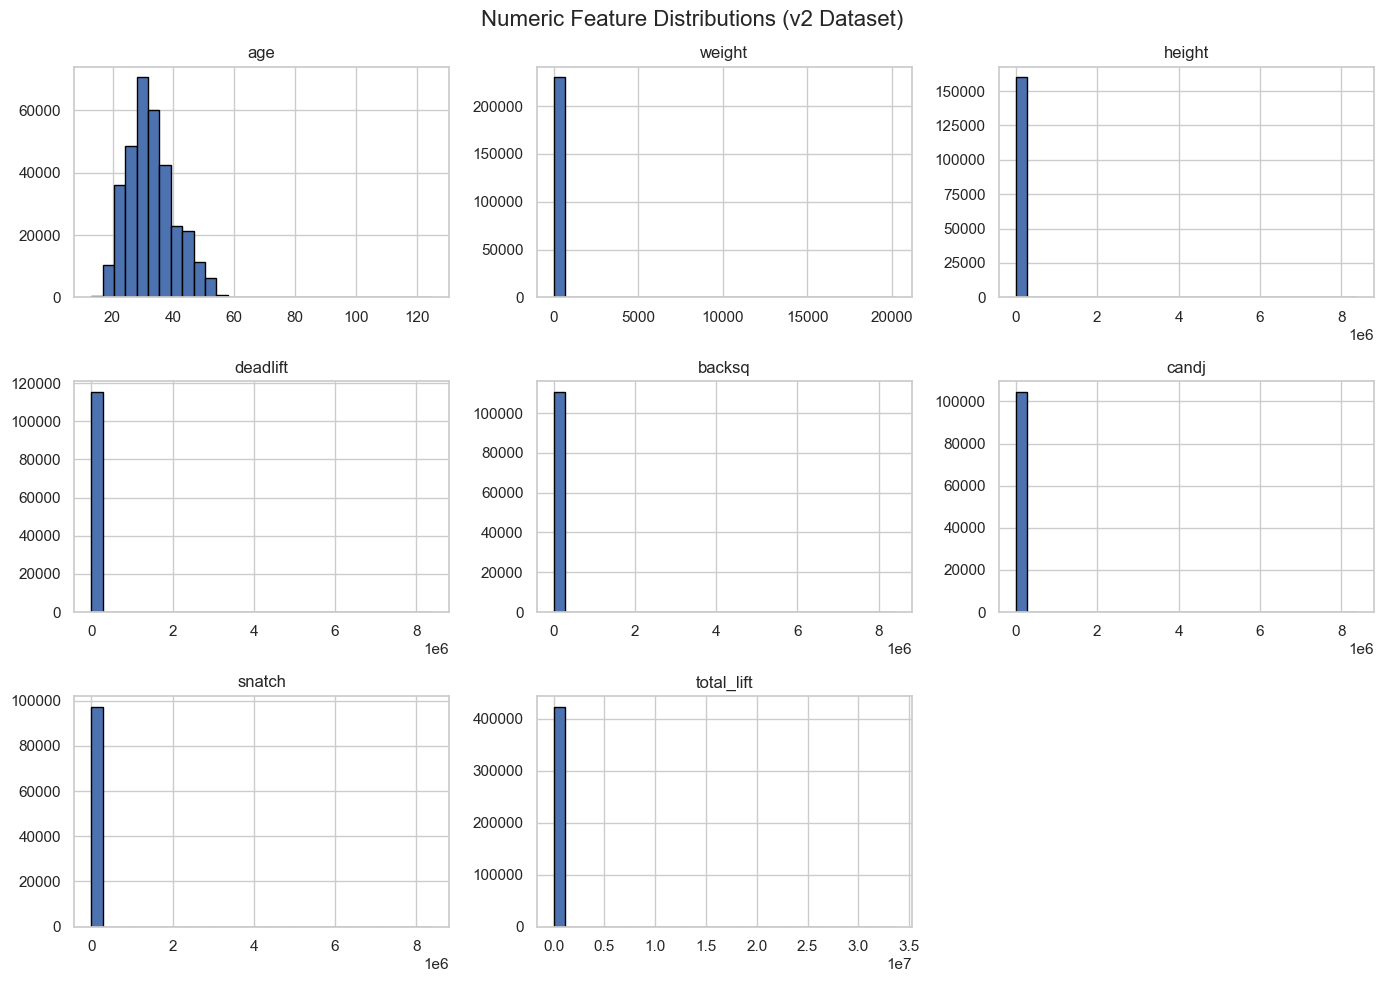

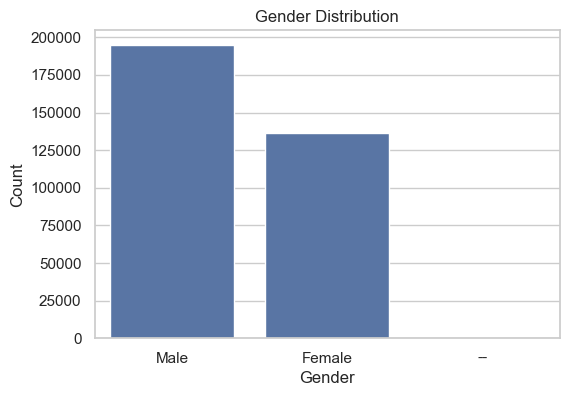

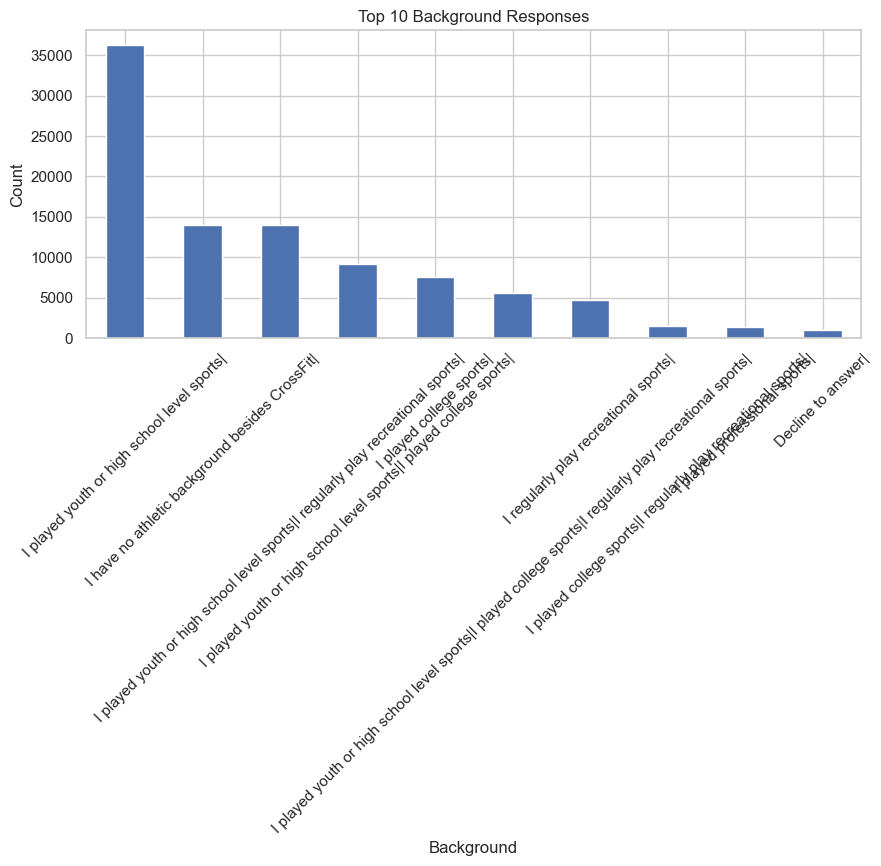

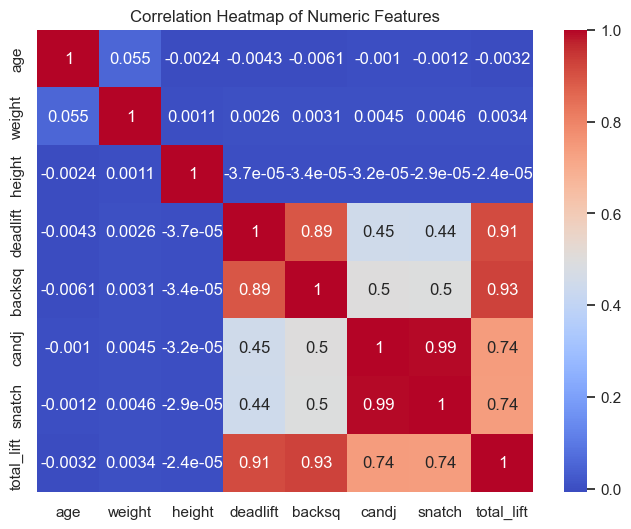

In [98]:
#5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")



numeric_cols = ['age', 'weight', 'height', 'deadlift', 'backsq', 'candj', 'snatch', 'total_lift']
v1[numeric_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Numeric Feature Distributions (v2 Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=v1)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10, 4))
v1['background'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Background Responses")
plt.xlabel("Background")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(v1[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



In [100]:
#6，7
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


imputer = SimpleImputer(strategy='mean') 


X_train_v1 = imputer.fit_transform(X_train_v1)
X_test_v1 = imputer.transform(X_test_v1)

model_v1 = LinearRegression()
model_v1.fit(X_train_v1, y_train_v1)

y_pred_v1 = model_v1.predict(X_test_v1)

mae_v1 = mean_absolute_error(y_test_v1, y_pred_v1)
r2_v1 = r2_score(y_test_v1, y_pred_v1)



rmse_v1 = mean_squared_error(y_test_v1, y_pred_v1, squared=False)
#7
results = pd.DataFrame({
    'Version': ['v1 (Raw)'],
    'MAE': [mae_v1],
    'RMSE': [rmse_v1],
    'R^2': [r2_v1]
})
print(results)


    Version          MAE           RMSE       R^2
0  v1 (Raw)  1399.595278  158747.440267 -0.442434


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


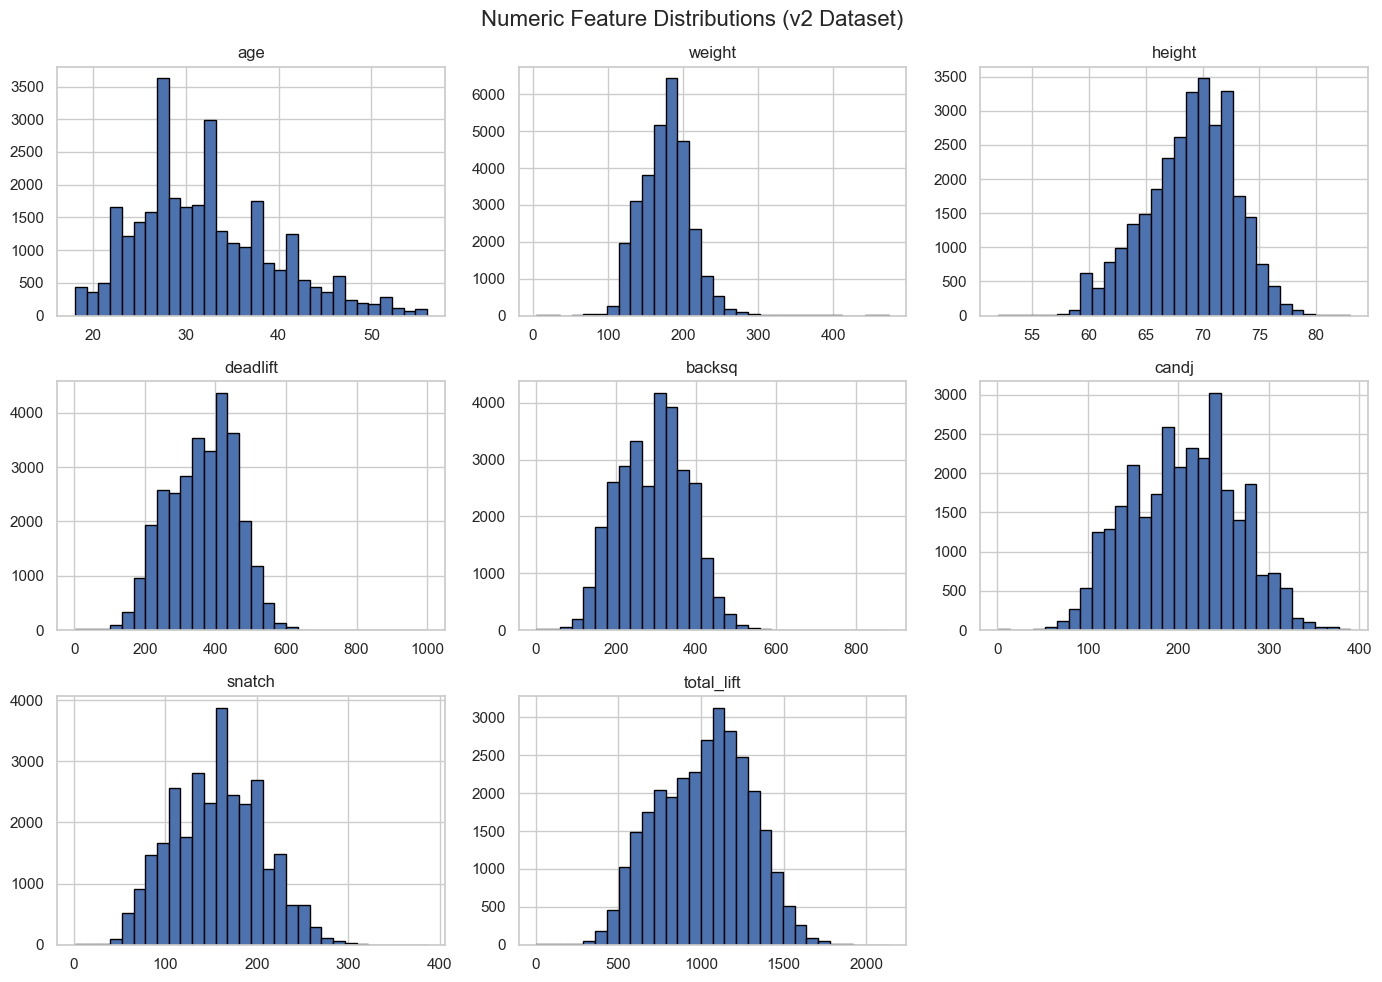

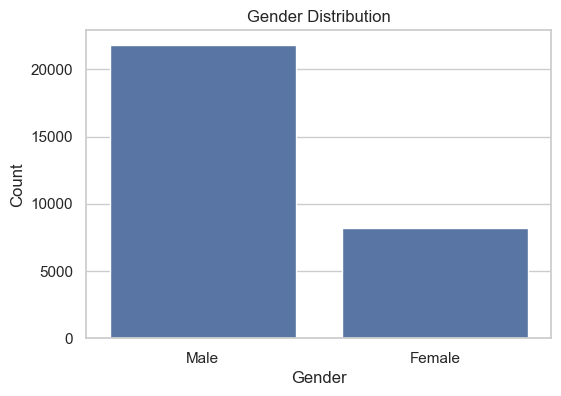

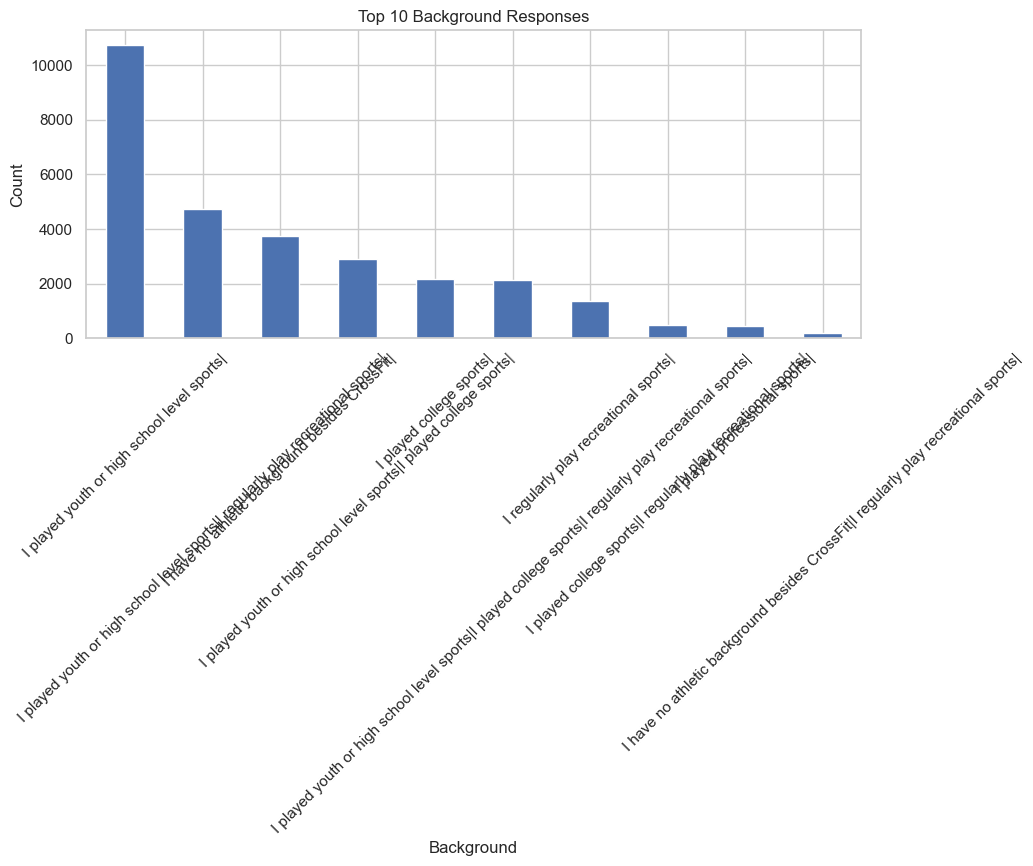

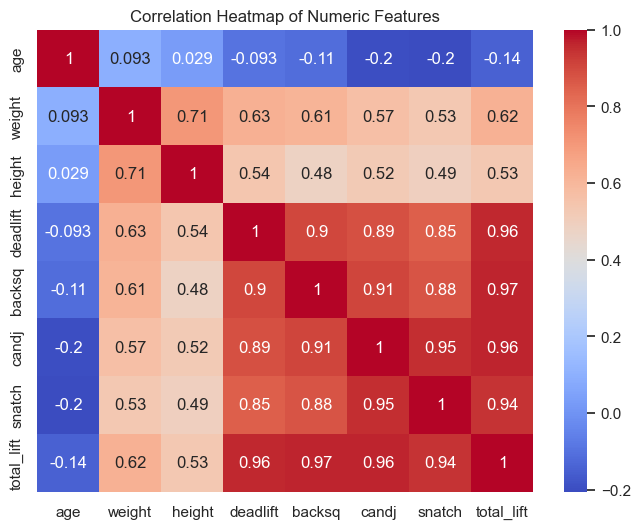

In [102]:
#8，9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")



numeric_cols = ['age', 'weight', 'height', 'deadlift', 'backsq', 'candj', 'snatch', 'total_lift']
v2[numeric_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Numeric Feature Distributions (v2 Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=v2)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10, 4))
v2['background'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Background Responses")
plt.xlabel("Background")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(v2[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [104]:
#10，11
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


v2['total_lift'] = v2[['deadlift', 'backsq', 'candj', 'snatch']].sum(axis=1)

features = ['age', 'weight', 'height']
target = 'total_lift'


v2_model = v2.dropna(subset=features + [target])

X = v2_model[features].values
y = v2_model[target].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


results = pd.DataFrame({
    'Version': ['v2 '],
    'MAE': [mae],
    'RMSE': [rmse],
    'R^2': [r2]
})
print(results)


  Version         MAE        RMSE       R^2
0     v2   164.744803  208.854101  0.439205


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
